# HTML boilerplate
    <!DOCTYPE html>
    <html>
        <head>
            <title>My Web App</title>
            <link rel='stylesheet' href="{{ url_for('static', 'styles.css') }}">
        </head>
        <body>
            <!-- My content -->
        </body>
    </html>
        

# CSS
## CSS Box Model
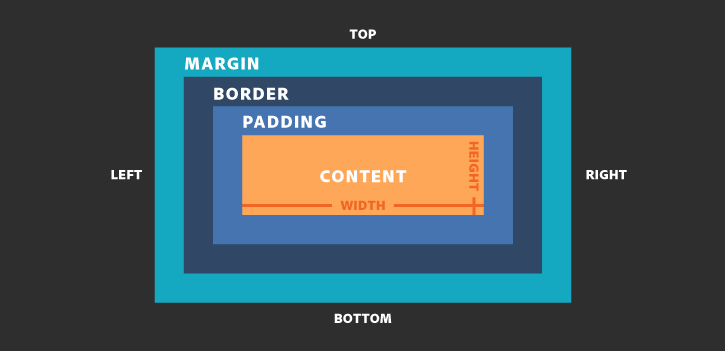

## CSS Formatting
    <a id='link' href='link.html'>
    #link { font-family: sans-serif; } 
<b>\# for id<br>
Note: id is unique to one element only</b>

    <a class='simple' href='link2.html'>
    <a class='simple' href='link3.html'>
    .simple { font-size: 16px; }
<b>. for class</b>

    <p>This is <i>italics and 16 px</i></p>
    p i { font-size: 16 px; }
<b>Must meet both p and i (in that particular nested order) to apply style</b>

    h1, h2, h3 { color: red; }
<b>Apply to h1, h2 and h3</b>

# Flask
## Boilerplate

In [ ]:
import flask
from flask import render_template

app = flask.Flask(__name__)

@app.route('/<name>', methods=['GET', 'POST'])
def index(name):
    #                                 Jinja2 Python
    #                                     v     v 
    return render_template('index.html', name=name)
    #return ('', 500) #500 is HTTP Response code

if __name__ == "__main__":
    app.run(port=12345, debug=True)

## Redirection
` return redirect(url_for('profile', name="admin"))`<br>
HTTP response code: 302 Found<br>
Browser will make request to run `profile(name='admin')`

## Jinja 2 syntax
`{{ }}` to replace <br>
`{% command %}` commands: if, elif, else, endif | for, endfor
`{{ abc|filter }}` filters: length, safe (safe means render as raw HTML, no sanitization)
HTML excerpt:

    ...
        <body>
            <p>Your name is {{ name|length }} characters long and your name is {{ name|safe }}.</p>
            {% if name == 'Tim Cook' %}
            <p>Welcome back to Apple!</p>
            {% endif %}
            <table>
                <tr><th>List of Apple Products</th><tr>
                {% for product in products %}
                <tr><td>{{ product }}</td></tr>
                {% endfor %}
        </body>
    ...
        

## Form Processing & DB Error Handling in Python

    ...
    <body>
        <form method="POST" action="/postmehere" enctype='multipart/form-data>
            <p>Filename: <input type='text' name='filename'></p>
            <p>Submit document: <input type='file' name='document'></p>
            <p><input type='submit' name='submit' value='This'></p>
            <p><input type='submit' name='submit' value='That'></p> <!-- Handling 2 submit buttons -->
        </form>
    </body>
    ...
            
            

In [6]:
import flask
from flask import request, render_template, redirect, send_from_directory
from werkzeug.utils import secure_filename
import sqlite3
import sys

app = flask.Flask(__name__)

@app.route('/GET_formsubmit/')
def GET_formsubmit():
    name = request.args['name']

"""
For POST form with file, form enctype must be 'multipart/form-data'
"""
@app.route('/', methods=['GET', 'POST'])
def POST_form():
    if request.method == "GET":
        #Show form
        return render_template('form.html')
    if request.method == "POST":
        #Do processing
        
        #Below code shows SQL Error Handling (VERY IMPT TO NOT LOCK SQL DATABASE!!!)
        try:
            conn = sqlite3.connect("database.db")
            conn.execute("INSERT INTO Table....")
            conn.commit()
            conn.close()
            return render_template('form.html')
        except: #Exception handling
            conn.close()
            print(sys.exc_info())
                   

## Image Processing

<b>View.html</b>

    ...
    <body>
        {% for photo in filenames %}
        <img src="{{ url_for('get_file', filename=photo[filename]) }} alt={{ photo[filename] }}"
        {% endfor %}
    </body>
    ...

In [ ]:
import flask
from flask import request, render_template, redirect, send_from_directory
from werkzeug.utils import secure_filename
import os, sqlite3

@app.route('/', methods=["GET", "POST"])
def upload():
    if request.method == "POST":
        photo = request.files['photo'] #Extract Photo object with binary data and metadata (filename etc)
        filename = secure_filename(photo.filename) #Input sanitization
        path = os.path.join('uploads', filename) #Path is now /uploads/<filename>
        photo.save(path) #Save at /uploads/<filename>
        
        #Add filename to database
        conn = sqlite3.connect("photo.db")
        conn.execute("INSERT INTO Photo(filename) VALUES(?)", (filename,))
        conn.commit()
        conn.close()
        
@app.route('/view')
def view():
    conn = sqlite3.connect("photo.db")
    conn.row_factory = sqlite3.Row
    cursor = conn.execute("SELECT filename FROM Photo")
    filenames = cursor.fetchall()
    return render_template("view.html", filenames=filenames)

@app.route('/photo/<filename>')
def get_file(filename):
    return send_from_directory('uploads', filename)
    #                             ^           ^
    #                          folder      filename

## General Pointers for Flask
1. The debug PIN does not print out in IDLE.
2. To prevent DB lock, it is very important to do DB exception handling, especially if debugger is ON.